In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
loan_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Loan_Data/loan_train.csv" )
loan_data.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP002305,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
1,1,LP001715,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1
2,2,LP002086,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
3,3,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,1
4,4,LP002529,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1


In [5]:
categorical_feature = [feature for feature in loan_data.columns if loan_data[feature].dtype=='object']
for i in categorical_feature:
  print("the number of variables in {} : {}".format(i,loan_data[i].nunique()))

the number of variables in Loan_ID : 491
the number of variables in Gender : 2
the number of variables in Married : 2
the number of variables in Dependents : 4
the number of variables in Education : 2
the number of variables in Self_Employed : 2
the number of variables in Property_Area : 3


In [6]:
numerical_feature = [feature for feature in loan_data.columns if feature not in categorical_feature]
print(numerical_feature)

['Unnamed: 0', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status']


In [7]:
# Missing value handling  CATEGORICAL
for i in categorical_feature:
  loan_data[i].fillna(loan_data[i].value_counts().index[0],inplace=True)
loan_data[categorical_feature].isnull().mean()*100

Loan_ID          0.0
Gender           0.0
Married          0.0
Dependents       0.0
Education        0.0
Self_Employed    0.0
Property_Area    0.0
dtype: float64

In [8]:
## Since LoanAmount is Continuous hence we'll impute it with median value
loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].median(),inplace=True)

In [9]:
## Since Loan_Amount_Term and Credit_History are discrete features we'll impute it with mode value
loan_data['Credit_History'].fillna(1.0,inplace=True)
loan_data['Loan_Amount_Term'].fillna(360.0,inplace=True)
loan_data[numerical_feature].isnull().mean()

Unnamed: 0           0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Loan_Status          0.0
dtype: float64

In [143]:
loan_data.Dependents.unique()

array(['0', '3+', '2', '1'], dtype=object)

In [144]:
# Dropping unnecessary feature

loan_data.drop(['Unnamed: 0','Loan_ID'],axis=1,inplace=True)

#### Preprocessing

In [145]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
le = LabelEncoder()
Oe = OrdinalEncoder()

In [146]:
df = loan_data.copy()

In [147]:
df['Ordinal_Encoded_Property_Area'] = df['Property_Area'].map({'Rural':0,'Semiurban':1,'Urban':2})
df['Ordinal_Encoded_Dependents'] = df['Dependents'].map({'0':0,'1':1,'2':2,'3+':3})
df['Label_Encoded_Education'] = df['Education'].map({'Graduate':1,'Not Graduate':0})

In [148]:
#df['Label_Encoded_Education'] = le.fit_transform(df['Education'])
df['Label_Encoded_Gender'] = le.fit_transform(df['Gender'])
df['Label_Encoded_Self_Employed'] = le.fit_transform(df['Self_Employed'])
df['Label_Encoded_Married'] = le.fit_transform(df['Married'])

In [149]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Ordinal_Encoded_Property_Area,Ordinal_Encoded_Dependents,Label_Encoded_Education,Label_Encoded_Gender,Label_Encoded_Self_Employed,Label_Encoded_Married
0,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1,1,0,1,0,0,0
1,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1,0,3,0,1,1,1
2,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0,2,0,1,0,0,1
3,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,360.0,1.0,Urban,1,2,0,0,1,1,1
4,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1,1,2,1,1,0,1


In [150]:
df.drop(['Gender','Married','Dependents','Education','Self_Employed'],axis=1,inplace=True)
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Ordinal_Encoded_Property_Area,Ordinal_Encoded_Dependents,Label_Encoded_Education,Label_Encoded_Gender,Label_Encoded_Self_Employed,Label_Encoded_Married
0,4547,0.0,115.0,360.0,1.0,Semiurban,1,1,0,1,0,0,0
1,5703,0.0,130.0,360.0,1.0,Rural,1,0,3,0,1,1,1
2,4333,2451.0,110.0,360.0,1.0,Urban,0,2,0,1,0,0,1
3,4695,0.0,96.0,360.0,1.0,Urban,1,2,0,0,1,1,1
4,6700,1750.0,230.0,300.0,1.0,Semiurban,1,1,2,1,1,0,1


In [151]:
df.drop('Property_Area',axis=1,inplace=True)
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Ordinal_Encoded_Property_Area,Ordinal_Encoded_Dependents,Label_Encoded_Education,Label_Encoded_Gender,Label_Encoded_Self_Employed,Label_Encoded_Married
0,4547,0.0,115.0,360.0,1.0,1,1,0,1,0,0,0
1,5703,0.0,130.0,360.0,1.0,1,0,3,0,1,1,1
2,4333,2451.0,110.0,360.0,1.0,0,2,0,1,0,0,1
3,4695,0.0,96.0,360.0,1.0,1,2,0,0,1,1,1
4,6700,1750.0,230.0,300.0,1.0,1,1,2,1,1,0,1


#### Model Building with label_Encoding

In [152]:
X = df.drop('Loan_Status',axis=1)
y = df.Loan_Status

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_val = train_test_split(X,y,test_size = 0.2,random_state=42)

In [19]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

nbc = GaussianNB()
lr = LogisticRegression()
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()

In [20]:
from sklearn.metrics import f1_score,accuracy_score

In [155]:
def model_predictions(X_train_data,y_train_data,X_test_data,y_val_data):
  
  rfc.fit(X_train_data,y_train_data)
  pred1 = rfc.predict(X_test_data)
  print("The accuracy of Random Forest model is {} and the F1 score is {}".format(np.round(accuracy_score(pred1,y_val_data),4),np.round(f1_score(pred1,y_val_data),4)))
  print("-"*20,"\n")

  gbc.fit(X_train_data,y_train_data)
  pred2 = gbc.predict(X_test_data)
  print("The accuracy of Gradient Boosting model is {} and the F1 score is {}".format(np.round(accuracy_score(pred2,y_val_data),4),np.round(f1_score(pred2,y_val_data),4)))
  print("-"*20,'\n')

  nbc.fit(X_train_data,y_train_data)
  pred3 = nbc.predict(X_test_data)
  print("The accuracy of Naive Bayes model is {} and the F1 score is {}".format(np.round(accuracy_score(pred3,y_val_data),4),np.round(f1_score(pred3,y_val_data),4)))
  print("-"*20,'\n')

  lr.fit(X_train_data,y_train_data)
  pred4 = lr.predict(X_test_data)
  print("The accuracy of Logistic Regression model is {} and the F1 score is {}".format(np.round(accuracy_score(pred4,y_val_data),4),np.round(f1_score(pred4,y_val_data),4)))

In [156]:
model_predictions(X_train,y_train,X_test,y_val)

The accuracy of Random Forest model is 0.8182 and the F1 score is 0.8732
-------------------- 

The accuracy of Gradient Boosting model is 0.7879 and the F1 score is 0.8531
-------------------- 

The accuracy of Naive Bayes model is 0.798 and the F1 score is 0.8592
-------------------- 

The accuracy of Logistic Regression model is 0.7172 and the F1 score is 0.8205


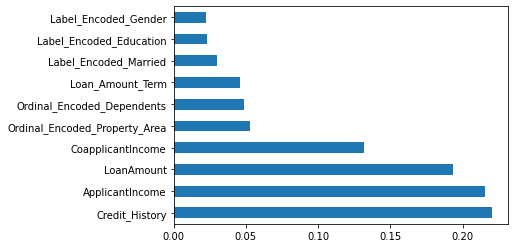

In [157]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
rf_clf = RandomForestClassifier(n_estimators=10000, random_state=1, n_jobs=-1)

# n_estimators = The number of trees in the forest.
# n_jobs = -1 : Use all processors for training

# Train the classifier
rf_clf.fit(X_train, y_train)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(rf_clf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [158]:
df.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'Ordinal_Encoded_Property_Area', 'Ordinal_Encoded_Dependents',
       'Label_Encoded_Education', 'Label_Encoded_Gender',
       'Label_Encoded_Self_Employed', 'Label_Encoded_Married'],
      dtype='object')

In [174]:
def model_predict(Encoded_Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History):
  x = np.zeros(len(X_train.columns))
  x[0] = ApplicantIncome
  x[1] = LoanAmount
  x[2] = CoapplicantIncome
  x[3] = Ordinal_Encoded_Property_Area
  x[4] = Ordinal_Encoded_Dependents
  x[5] = Loan_Amount_Term

  return rfc.predict([x])[0]

In [160]:
pred = lr.predict(X_test)


In [161]:
df.head(4)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Ordinal_Encoded_Property_Area,Ordinal_Encoded_Dependents,Label_Encoded_Education,Label_Encoded_Gender,Label_Encoded_Self_Employed,Label_Encoded_Married
0,4547,0.0,115.0,360.0,1.0,1,1,0,1,0,0,0
1,5703,0.0,130.0,360.0,1.0,1,0,3,0,1,1,1
2,4333,2451.0,110.0,360.0,1.0,0,2,0,1,0,0,1
3,4695,0.0,96.0,360.0,1.0,1,2,0,0,1,1,1


#### Model building with One_Hot_Encoding

In [10]:
dataset = loan_data.copy()
dataset.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP002305,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
1,1,LP001715,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1
2,2,LP002086,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
3,3,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,360.0,1.0,Urban,1
4,4,LP002529,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1


In [11]:
dataset['Encoded_Property_Area'] = dataset['Property_Area'].map({'Rural':0,'Semiurban':1,'Urban':2})

In [12]:
dataset.drop(['Unnamed: 0','Loan_ID','Property_Area'],axis=1,inplace=True)

In [13]:
dt = pd.get_dummies(dataset.drop(['Loan_Status','Encoded_Property_Area'],axis=1),drop_first=True)
dataset = pd.concat([dataset[['Loan_Status','Encoded_Property_Area']],dt],axis=1)

In [14]:
dataset.head()

,Loan_Status,Encoded_Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes
0,1,1,4547,0.0,115.0,360.0,1.0,0,0,0,0,0,0,0
1,1,0,5703,0.0,130.0,360.0,1.0,1,1,0,0,1,1,1
2,0,2,4333,2451.0,110.0,360.0,1.0,0,1,0,0,0,0,0
3,1,2,4695,0.0,96.0,360.0,1.0,1,1,0,0,0,1,1
4,1,1,6700,1750.0,230.0,300.0,1.0,1,1,0,1,0,0,0


In [22]:
X = dataset.drop('Loan_Status',axis=1)
y = dataset.Loan_Status
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_val = train_test_split(X,y,test_size = 0.2,random_state=42)

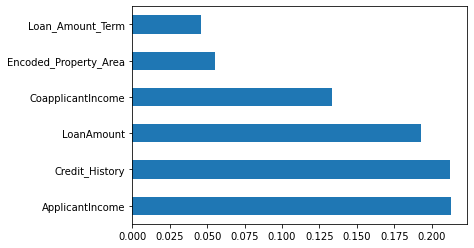

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
rf_clf = RandomForestClassifier(n_estimators=10000, random_state=1, n_jobs=-1)

# n_estimators = The number of trees in the forest.
# n_jobs = -1 : Use all processors for training

# Train the classifier
rf_clf.fit(X_train, y_train)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(rf_clf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(6).plot(kind='barh')
plt.show()

In [17]:
def model_predictions2(X_train_data,y_train_data,X_test_data,y_val_data):
  
  rfc.fit(X_train_data,y_train_data)
  pred1 = rfc.predict(X_test_data)
  print("The accuracy of Random Forest model is {} and the F1 score is {}".format(np.round(accuracy_score(pred1,y_val_data),4),np.round(f1_score(pred1,y_val_data),4)))
  print("-"*20,"\n")

  gbc.fit(X_train_data,y_train_data)
  pred2 = gbc.predict(X_test_data)
  print("The accuracy of Gradient Boosting model is {} and the F1 score is {}".format(np.round(accuracy_score(pred2,y_val_data),4),np.round(f1_score(pred2,y_val_data),4)))
  print("-"*20,'\n')

  nbc.fit(X_train_data,y_train_data)
  pred3 = nbc.predict(X_test_data)
  print("The accuracy of Naive Bayes model is {} and the F1 score is {}".format(np.round(accuracy_score(pred3,y_val_data),4),np.round(f1_score(pred3,y_val_data),4)))
  print("-"*20,'\n')

  lr.fit(X_train_data,y_train_data)
  pred4 = lr.predict(X_test_data)
  print("The accuracy of Logistic Regression model is {} and the F1 score is {}".format(np.round(accuracy_score(pred4,y_val_data),4),np.round(f1_score(pred4,y_val_data),4)))

In [24]:
model_predictions2(X_train,y_train,X_test,y_val)

The accuracy of Random Forest model is 0.798 and the F1 score is 0.8571
-------------------- 

The accuracy of Gradient Boosting model is 0.7778 and the F1 score is 0.8451
-------------------- 

The accuracy of Naive Bayes model is 0.798 and the F1 score is 0.8592
-------------------- 

The accuracy of Logistic Regression model is 0.8182 and the F1 score is 0.8784


In [171]:
def model_predict2(Encoded_Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History):
  x = np.zeros(len(X_train.columns))
  x[0] = Encoded_Property_Area
  x[1] = ApplicantIncome
  x[2] = CoapplicantIncome
  x[3] = LoanAmount
  x[4] = Loan_Amount_Term
  x[5] = Credit_History

  return lr.predict([x])[0]

In [172]:
dataset.iloc[1]

Loan_Status                  1.0
Encoded_Property_Area        0.0
ApplicantIncome           5703.0
CoapplicantIncome            0.0
LoanAmount                 130.0
Loan_Amount_Term           360.0
Credit_History               1.0
Gender_Male                  1.0
Married_Yes                  1.0
Dependents_1                 0.0
Dependents_2                 0.0
Dependents_3+                1.0
Education_Not Graduate       1.0
Self_Employed_Yes            1.0
Name: 1, dtype: float64

In [175]:
model_predict2(0.0,5703.0,0.0,130.0,360.0,1.0)

1

In [25]:
import pickle
# open a file, where you ant to store the data
file = open('loan_prediction.pkl', 'wb')

# dump information to that file
pickle.dump(lr, file)